# Chaining Methods

For methods which allow user-supplied input, but not a very wide variety of pre-canned
initialization methods, you can chain embedding methods together.


In [1]:
import drnb.embed.pipeline as pl

## Basic Example

Pretty easy to chain methods together if you don't want to change their defaults, as you just
provide the methods as a string. For example, the sklearn version metric multi-dimensional scaling
only allows random initialization if you don't provide your own input. So the following provides
PCA results as input:

[18:04:28] WARNING  151 nearest neighbors requested but only 150 items are available   ]8;id=778761;file:///home/james/dev/drnb3/src/drnb/eval/nbrpres.py\nbrpres.py]8;;\:]8;id=71368;file:///home/james/dev/drnb3/src/drnb/eval/nbrpres.py#80\80]8;;\

           INFO     Loading faiss with AVX2 support.                                   ]8;id=557948;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=573474;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=297228;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=925603;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

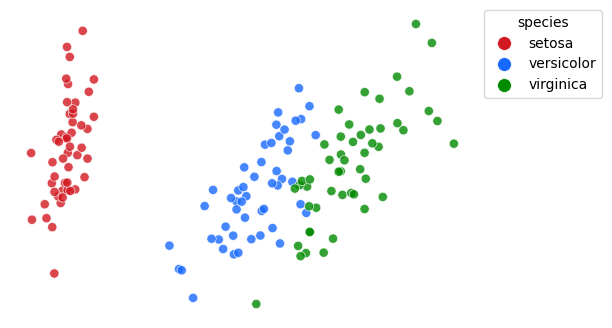

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.9786666666666668), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.9985053), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.8173333333333332), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.9653333333333333), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=nan, info={'metric': 'euclidean', 'n_neighbors': 150})]

In [2]:
pl.standard_eval(method=["pca", "sklearn-mmds"], dataset="iris")

## Advanced Example

You can also chain together methods that need parameterization. *Probably* easier to use the
`pl.embedder` function for this, but for the final t-SNE step, I provided a tuple directly (bit of
a toss-up as to which is more readable).

[18:04:29] INFO     Getting dataset tasic2018-pca50                                  ]8;id=652691;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=649689;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=798428;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=44858;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Running SMMDS                                                       ]8;id=644877;file:///home/james/dev/drnb3/src/drnb/embed/smmds.py\smmds.py]8;;\:]8;id=617236;file:///home/james/dev/drnb3/src/drnb/embed/smmds.py#171\171]8;;\

[18:04:30] INFO     Initializing via (unscaled) PCA                                      ]8;id=742115;file:///home/james/dev/drnb3/src/drnb/yinit.py\yinit.py]8;;\:]8;id=109453;file:///home/james/dev/drnb3/src/drnb/yinit.py#63\63]8;;\

[18:04:40] INFO     Embedding completed                                                 ]8;id=461087;file:///home/james/dev/drnb3/src/drnb/embed/smmds.py\smmds.py]8;;\:]8;id=82059;file:///home/james/dev/drnb3/src/drnb/embed/smmds.py#174\174]8;;\

           INFO     Rescaling                                                          ]8;id=264009;file:///home/james/dev/drnb3/src/drnb/embed/rescale.py\rescale.py]8;;\:]8;id=187044;file:///home/james/dev/drnb3/src/drnb/embed/rescale.py#30\30]8;;\

           INFO     Using precomputed knn                                                ]8;id=519739;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=749477;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#229\229]8;;\

           INFO     Using k_neighbors (no self) = 90 with perplexity 30.00               ]8;id=801816;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=260321;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#151\151]8;;\

           INFO     Found pre-calculated neighbors file:                             ]8;id=434809;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=305254;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#319\319]8;;\
                    nn/tasic2018-pca50.151.euclidean.exact.faiss.idx.npy                            

           INFO     KNN index provided. Ignoring KNN-related parameters.             ]8;id=447279;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=122812;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/openTSNE/affinity.py#190\190]8;;\

[18:04:41] INFO     Using precomputed initial coordinates                                ]8;id=40682;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=614693;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#241\241]8;;\

           INFO     Running t-SNE                                                        ]8;id=844446;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=530870;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#266\266]8;;\

           WARNING  Standard deviation of embedding is greater than 0.0001. Initial       ]8;id=762582;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=471605;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#35\35]8;;\
                    embeddings with high variance may have display poor convergence.                

           INFO     Running early exaggeration with exaggeration = 12.00 for 125         ]8;id=152359;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=628468;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#101\101]8;;\
                    iterations                                                                      

[18:04:44] INFO     Annealing exaggeration from 12.00 to 1.0 over 125 iterations         ]8;id=654739;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=16778;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#114\114]8;;\

[18:04:50] INFO     Running final optimization with momentum = 0.80 for 500 iterations   ]8;id=932133;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=453943;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#128\128]8;;\

[18:05:51] INFO     Embedding completed                                                  ]8;id=671501;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=271494;file:///home/james/dev/drnb3/src/drnb/embed/tsne.py#296\296]8;;\

           INFO     Evaluating                                                       ]8;id=290623;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=191692;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=485446;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=751883;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=854635;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=602918;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/tasic2018-pca50.5.1337.idx.npy      ]8;id=866178;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=781460;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=716402;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=858200;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=233347;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=995543;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=490952;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=655917;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/tasic2018-pca50.5.1337.idx.npy      ]8;id=18809;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=224848;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=929737;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=722111;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=795631;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=914303;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

[18:05:53] INFO     Plotting                                                         ]8;id=237823;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=3;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

           INFO     Not showing large legend                                          ]8;id=778179;file:///home/james/dev/drnb3/src/drnb/plot/seaborn.py\seaborn.py]8;;\:]8;id=876043;file:///home/james/dev/drnb3/src/drnb/plot/seaborn.py#124\124]8;;\

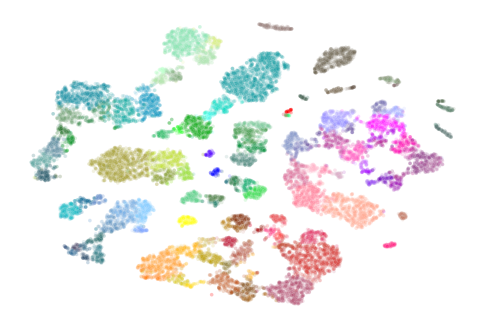

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.721711023423726), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.505203), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.4676825343519995), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.5240769037024599), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.6125830464836426), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [3]:
pl.standard_eval(
    method=[
        pl.embedder(
            "smmds",
            params=dict(n_epochs=5000, n_samples=3, learning_rate=1.0),
        ),
        pl.embedder("rescale", params=dict(max_coord=40)),
        ("tsne", dict(anneal_exaggeration=True, params=dict(learning_rate=10))),
    ],
    dataset="tasic2018-pca50",
    verbose=True,
)